In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#lendo o arquivo 
url = "https://raw.githubusercontent.com/tatianaesc/datascience/main/diabetes.csv"

diabetes = pd.read_csv(url, delimiter= ',')

In [16]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
print(diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [20]:
#removendo possíveis dados duplicados

diabetes = diabetes.drop_duplicates()

In [21]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


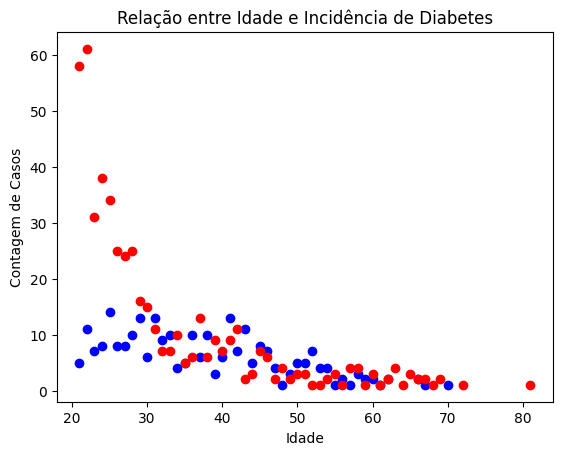

In [22]:
#observando a relação entre a idade e o resultado do teste

#lista de casos positivos e negativos
positive_cases = diabetes[diabetes["Outcome"] == 1]
negative_cases = diabetes[diabetes["Outcome"] == 0]

#contagem dos casos positivos e negativos por idade
positive_counts = positive_cases["Age"].value_counts().sort_index()
negative_counts = negative_cases["Age"].value_counts().sort_index()


#plotando o gráfico
plt.scatter(positive_counts.index, positive_counts.values, c='blue', label="Casos Positivos")
plt.scatter(negative_counts.index, negative_counts.values, c='red', label="Casos Negativos")
plt.title("Relação entre Idade e Incidência de Diabetes")
plt.xlabel("Idade")
plt.ylabel("Contagem de Casos")
plt.show()

Vamos treinar modelos com o objetivo de encontrar o mais adequado para prever se um paciente terá ou não diabetes, com base nas medidas de diagnóstico presentes no conjunto de dados.

In [23]:
#configuração para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

#importando bibliotecas necessárias

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
#tamanho do conjunto de teste
test_size = 0.20

In [25]:
#semente aleatória
seed = 13

In [26]:
#separação dos conjuntos de treino e teste
array = diabetes.values

X = array[:,0:8]
y = array[:,8]

In [27]:
#holdout com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size, shuffle= True, random_state= seed, stratify= y)

In [28]:
#parâmetros e partições da validação cruzada
scoring = "accuracy"

num_particoes = 10


In [29]:
#validação cruzada com estratificação
kfold = StratifiedKFold(n_splits= num_particoes, shuffle= True, random_state= seed)

Modelagem e inferência: vamos treinar e avaliar os modelos usando a métrica de acurácia

In [30]:
#definindo uma semente global
np.random.seed(13)

In [31]:
#lista vazia para armazenar os modelos
modelos = []

In [32]:
#criando os modelos e armazenandoos na lista de modelos

modelos.append(('LR', LogisticRegression(max_iter= 200)))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))

In [33]:
#definindo os parâmetros do classficador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

In [34]:
#criando os modelos para o VotingClassifier
bases =[]

#modelo 1
modelo1 = LogisticRegression(max_iter= 200)
bases.append(("Logistic", modelo1))

#modelo2
modelo2 = DecisionTreeClassifier()
bases.append(("Cart", modelo2))

#modelo 3 
modelo3 = SVC()
bases.append(('SMV', modelo3))

In [35]:
#criando os ensembles e adicionando-os na lista de modelos 

modelos.append(('Bagging', BaggingClassifier(base_estimator= base, n_estimators= num_trees)))
modelos.append(("RF", RandomForestClassifier(n_estimators= num_trees, max_features= max_features)))
modelos.append(('ET', ExtraTreesClassifier(n_estimators= num_trees, max_features= max_features)))
modelos.append(('Ada', AdaBoostClassifier(n_estimators= num_trees)))
modelos.append(('GB', GradientBoostingClassifier(n_estimators= num_trees)))
modelos.append(('Voting', VotingClassifier(bases)))

In [36]:
#listas de armazenamento de resultados
results= []
names= []

In [37]:
#avaliando os modelos

for name, model in modelos:
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = ":%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

:LR: 0.770360 (0.034496)
:KNN: 0.724855 (0.026419)
:CART: 0.695690 (0.039220)
:NB: 0.752406 (0.033468)
:SVM: 0.755764 (0.045831)
:Bagging: 0.759149 (0.053176)
:RF: 0.768905 (0.041341)
:ET: 0.773744 (0.032083)
:Ada: 0.755685 (0.031746)
:GB: 0.744421 (0.041078)
:Voting: 0.771999 (0.043663)


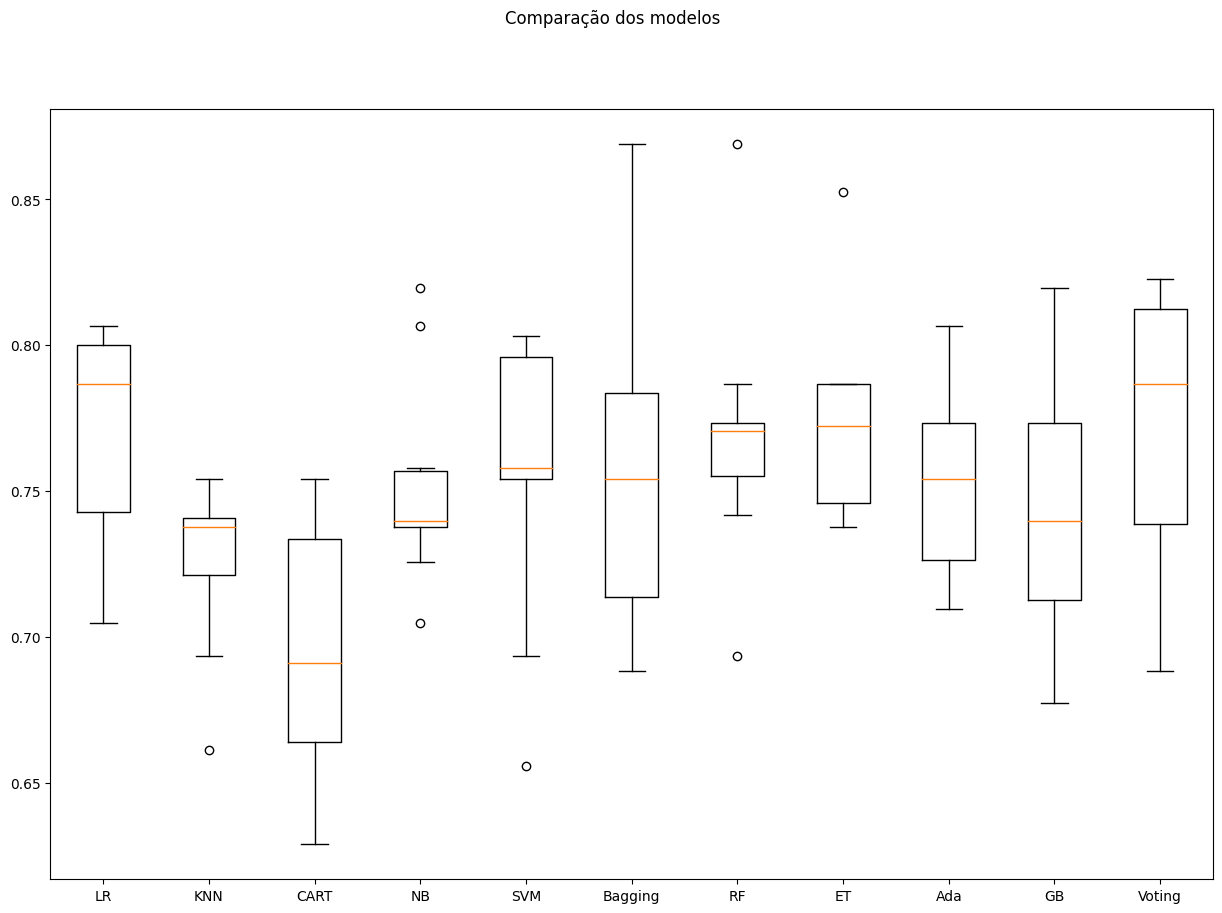

In [38]:
#plotando boxplot para comparação dos modelos

fig = plt.figure(figsize= (15, 10))
fig.suptitle("Comparação dos modelos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Vamos repetir o processo, utilizando a biblioteca Pipeline, para criar e avaliar os modelos atraves da validação cruzada com os dados padronizados e normalizados, a fim de evitar o data leakage. Por fim, vamos compara os resultados com os modelos treinados com o dataset original

In [39]:
#definindo uma semente global para o bloco
np.random.seed(13)

In [40]:
#listas para o armazenamento dos pipelines e dos resultados para toas as visões do dataset 

pipelines= []
results= []
names= []

Vamos criar os elementos do pipeline

In [41]:
#Algoritmos que vamos utilizar

reg_log = ('Lr', LogisticRegression(max_iter= 200))
knn = ("KNN", KNeighborsClassifier())
cart = ("CART", DecisionTreeClassifier())
naive_bayes = ("NB", GaussianNB())
svm = ("SVM", SVC())
bagging = ("Bag", BaggingClassifier(base_estimator= base, n_estimators= num_trees))
random_forest = ("RF", RandomForestClassifier(n_estimators= num_trees, max_features= max_features))
extra_trees = ("ET", ExtraTreesClassifier(n_estimators= num_trees, max_features= max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators= num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators= num_trees))
voting = ("Voting", VotingClassifier(bases))

In [42]:
#transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ("MinMaxScaler", MinMaxScaler())

Montando os Pipelines

In [43]:
#dataset original

pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(("KNN-orig", Pipeline([knn])))
pipelines.append(('Cart-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(("Bag-orig", Pipeline([bagging])))
pipelines.append(("RF-orig", Pipeline([random_forest])))
pipelines.append(("ET-orig", Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(("GB-orig", Pipeline([gradient_boosting])))
pipelines.append(("Voting-orig", Pipeline([voting])))

In [44]:
#dataset padrozinado

pipelines.append(('LR-orig', Pipeline([standard_scaler, reg_log])))
pipelines.append(("KNN-orig", Pipeline([standard_scaler, knn])))
pipelines.append(('Cart-orig', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-orig', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([standard_scaler, svm])))
pipelines.append(("Bag-orig", Pipeline([standard_scaler, bagging])))
pipelines.append(("RF-orig", Pipeline([standard_scaler, random_forest])))
pipelines.append(("ET-orig", Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-orig', Pipeline([standard_scaler, adaboost])))
pipelines.append(("GB-orig", Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(("Voting-orig", Pipeline([standard_scaler, voting])))

In [45]:
#dataset normalizado

pipelines.append(('LR-orig', Pipeline([min_max_scaler, reg_log])))
pipelines.append(("KNN-orig", Pipeline([min_max_scaler, knn])))
pipelines.append(('Cart-orig', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-orig', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([min_max_scaler, svm])))
pipelines.append(("Bag-orig", Pipeline([min_max_scaler, bagging])))
pipelines.append(("RF-orig", Pipeline([min_max_scaler, random_forest])))
pipelines.append(("ET-orig", Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-orig', Pipeline([min_max_scaler, adaboost])))
pipelines.append(("GB-orig", Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(("Voting-orig", Pipeline([min_max_scaler, voting])))

In [46]:
#executando os pipelines

for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR-orig: 0.770 (0.034)
KNN-orig: 0.725 (0.026)
Cart-orig: 0.696 (0.039)
NB-orig: 0.752 (0.033)
SVM-orig: 0.756 (0.046)
Bag-orig: 0.759 (0.053)
RF-orig: 0.769 (0.041)
ET-orig: 0.774 (0.032)
Ada-orig: 0.756 (0.032)
GB-orig: 0.744 (0.041)
Voting-orig: 0.772 (0.044)
LR-orig: 0.770 (0.033)
KNN-orig: 0.733 (0.033)
Cart-orig: 0.682 (0.035)
NB-orig: 0.752 (0.033)
SVM-orig: 0.769 (0.029)
Bag-orig: 0.751 (0.044)
RF-orig: 0.766 (0.047)
ET-orig: 0.785 (0.030)
Ada-orig: 0.754 (0.033)
GB-orig: 0.743 (0.040)
Voting-orig: 0.770 (0.033)
LR-orig: 0.769 (0.038)
KNN-orig: 0.725 (0.042)
Cart-orig: 0.692 (0.035)
NB-orig: 0.752 (0.033)
SVM-orig: 0.777 (0.030)
Bag-orig: 0.740 (0.045)
RF-orig: 0.771 (0.048)
ET-orig: 0.777 (0.035)
Ada-orig: 0.756 (0.032)
GB-orig: 0.744 (0.047)
Voting-orig: 0.770 (0.031)


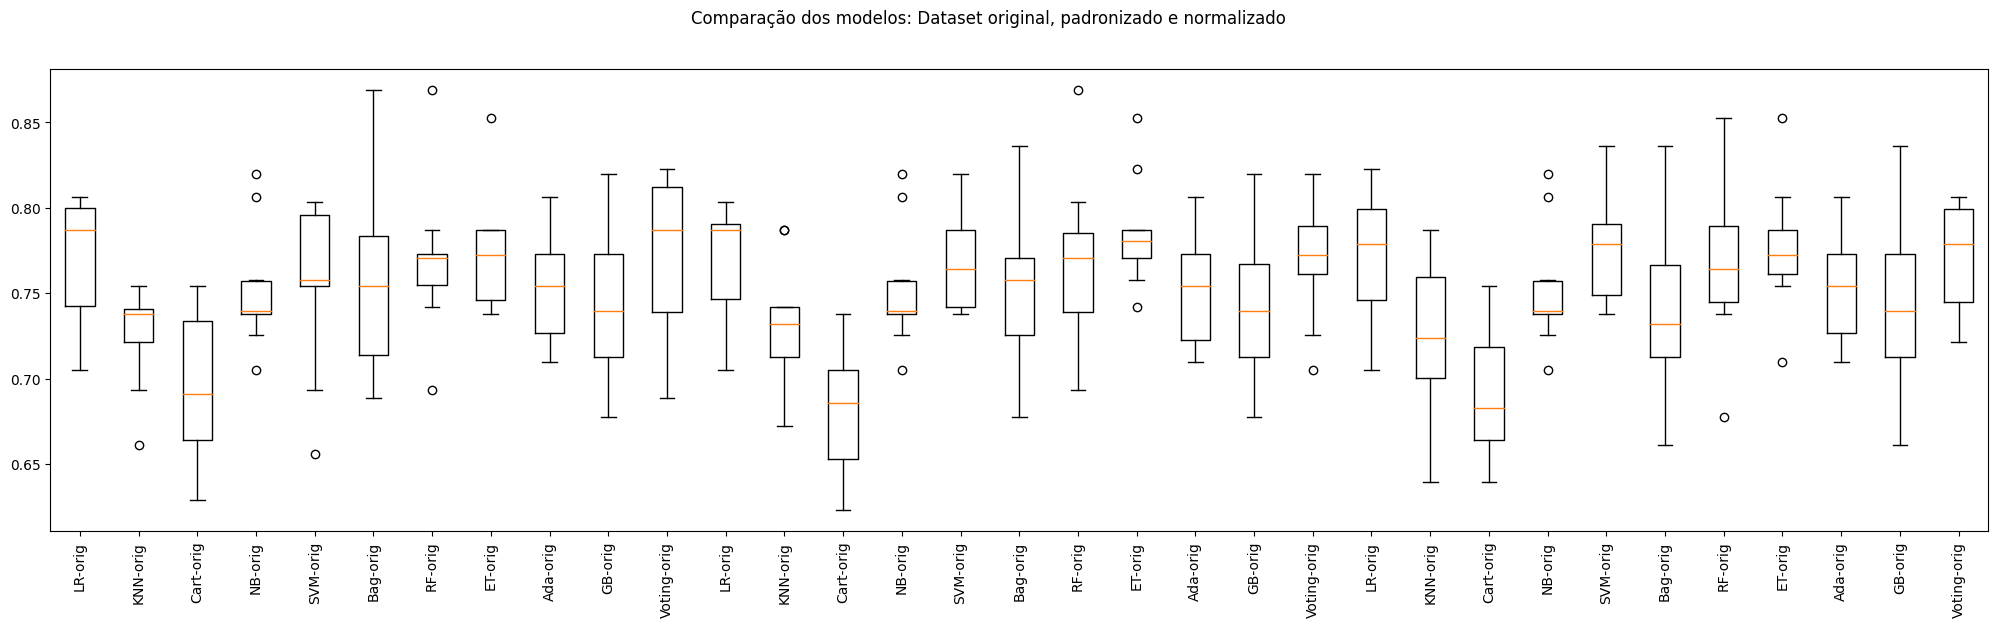

In [47]:
#plotando boxplot para comparação dos modelos

fig = plt.figure(figsize= (25, 6))
fig.suptitle('Comparação dos modelos: Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation = 90)
plt.show()